<a href="https://colab.research.google.com/github/PKRaj007/PKRaj007/blob/main/trained_and_tested_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os,cv2
import numpy as np
import pandas as pd
from math import exp, sqrt
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from keras.utils import np_utils
import keras
import tensorflow as tf
import tensorflow.keras.backend as K
from keras import Input 
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import  BatchNormalization, Concatenate, Add, DepthwiseConv2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam,Adagrad
from keras.layers.convolutional import Conv2D, MaxPooling2D

**DATA READING**

*Pre-proceesed using Modified homomorphsim with histogram equalization**

In [ ]:
data_path='/content/drive/MyDrive/Pixel attack/CK+'
data_dir_list = os.listdir(data_path)
img_data_list=[]
labels = []
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        # img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(input_img,(64,64))
        labels.append(dataset)
        img_data_list.append(img)    
label=np.array(labels)
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-4

Loaded the images of dataset-3

Loaded the images of dataset-2

Loaded the images of dataset-6

Loaded the images of dataset-5

Loaded the images of dataset-1

Loaded the images of dataset-0



(977, 64, 64, 3)

<function matplotlib.pyplot.show>

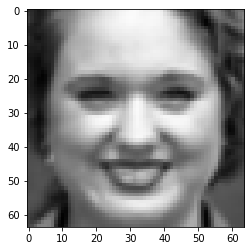

In [ ]:
plt.imshow(img_data[30], cmap = 'gray')
plt.show

In [ ]:
from sklearn.utils import shuffle
num_classes = 7
Y = np_utils.to_categorical(label, num_classes)
x,y = shuffle(img_data, Y, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(683, 64, 64, 3)
(683, 7)


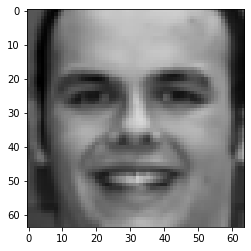

In [ ]:
plt.imshow(X_train[3])
plt.show()

In [ ]:
X_train = X_train.reshape(-1, 64,64,3)
X_val = X_val.reshape(-1, 64,64,3)

**CONCATENATION_of_Texture_Features*

**TRANSFORM_UNIT_MODEL**

In [ ]:
from keras.layers import LeakyReLU
def FER_MODEL(input_1,num_classes):
 
  input_1 = Input(shape=(64, 64, 3), name='input_1')
 
  conv1 = Conv2D(64,(3,3))(input_1)
  B1 = BatchNormalization()(conv1)
  A1 = Activation("relu")(B1)
  m1 = MaxPooling2D()(A1)
  conv2 = Conv2D(128,(5,5))(m1)
  B2 = BatchNormalization()(conv2)
  A2 = Activation("relu")(B2)
  m2 = MaxPooling2D()(A2)
  conv3 = Conv2D(256,(3,3))(m2)
  B3 = BatchNormalization()(conv3)
  A3 = Activation("relu")(B3)
  m3 = MaxPooling2D()(A3)
  conv4 = Conv2D(256,(3,3))(m3)
  B4 = BatchNormalization()(conv4)
  A4 = Activation("relu")(B4)
  m4 = MaxPooling2D()(A4)
  F = Flatten()(m4)
  # GAP = GlobalAveragePooling2D()(conv1)
  D1  = Dense(512, activation = "relu")(F)
  D2  = Dense(256, activation = "relu")(D1)
  
  OUT  = Dense(num_classes, activation='softmax')(D2)
  model = Model(inputs= [input_1], outputs= OUT, name="BaseModel")
  return model 



input_1 = Input(shape=(64, 64, 3), name='input_1')

model = FER_MODEL(input_1, 7)
model.summary()

Model: "BaseModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization_9 (Batc  (None, 62, 62, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 27, 27, 128)       20

In [ ]:
model.compile(optimizer= Adam(lr=0.0001, decay = 0.0006), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit([X_train], y_train, batch_size= 16, epochs=20, verbose=1,  shuffle = True)  #validation_data=([X_val], y_val),

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


43/43 [==============================] - 1s 14ms/step - loss: 1.2710 - accuracy: 0.5754
Epoch 2/20
43/43 [==============================] - 0s 8ms/step - loss: 0.5345 - accuracy: 0.8536
Epoch 3/20
43/43 [==============================] - 0s 9ms/step - loss: 0.2659 - accuracy: 0.9458
Epoch 4/20
43/43 [==============================] - 0s 9ms/step - loss: 0.1369 - accuracy: 0.9751
Epoch 5/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0658 - accuracy: 0.9941
Epoch 6/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.9985
Epoch 7/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 8/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 9/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0123 - accuracy: 0.9985
Epoch 10/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0159 - accuracy: 0.9985
Epoch 11/20
43/43 [==========

In [ ]:
preds_prob = model.predict([X_val])
y_pred_labels = np.argmax(preds_prob, axis=1) 
print(y_pred_labels)


[4 6 6 6 5 6 5 2 5 2 0 4 5 6 6 5 1 6 4 6 4 2 6 6 6 0 2 4 6 2 2 4 2 4 6 6 4
 0 4 2 2 3 6 4 6 4 5 2 4 1 6 4 5 4 2 2 2 2 2 1 2 6 1 3 2 2 2 2 1 2 4 4 4 4
 1 6 1 1 4 1 2 0 6 1 1 4 1 3 6 4 4 2 3 4 6 3 4 6 4 6 3 4 6 4 3 6 2 3 2 3 6
 6 5 6 4 4 4 2 1 6 6 4 3 4 0 0 4 4 4 1 0 6 1 3 4 6 1 6 6 6 4 2 5 1 4 1 1 6
 1 2 4 6 2 4 2 4 4 2 4 6 1 4 1 4 6 6 4 6 2 4 4 1 4 2 0 2 1 6 2 1 5 4 2 2 2
 6 2 2 4 3 3 1 4 5 6 4 3 1 3 4 5 1 5 1 4 2 6 6 5 3 2 3 4 2 2 1 0 6 6 6 4 2
 2 1 4 4 1 6 2 6 4 6 4 6 6 4 6 6 4 5 6 4 5 5 1 2 3 2 1 1 4 6 0 5 5 6 6 2 1
 6 3 6 6 1 4 6 1 1 6 1 0 4 1 5 5 0 2 0 6 2 5 6 2 1 2 4 2 3 6 2 6 4 1 6]


In [ ]:
y_true =  np.argmax(y_val, axis=1)
print(y_true) 

[4 6 6 6 5 6 5 2 6 2 0 4 3 6 6 5 1 6 4 6 4 2 6 6 6 0 2 4 6 2 2 4 2 4 6 6 4
 0 4 2 2 3 6 4 6 4 5 2 4 1 6 4 5 4 2 2 2 2 2 1 2 6 3 3 2 2 2 2 1 2 4 4 4 4
 1 6 1 1 4 1 2 0 6 1 1 4 1 3 6 3 4 2 3 4 6 3 4 6 4 6 3 3 6 4 3 6 2 3 2 3 6
 6 5 6 4 4 4 2 1 6 6 4 3 4 0 0 4 4 4 1 0 6 1 3 4 6 1 6 6 6 4 2 5 1 4 1 1 6
 1 2 4 6 2 4 2 4 4 2 4 6 1 4 1 4 6 6 4 6 2 4 3 1 4 2 0 2 1 6 2 1 5 4 2 2 2
 6 2 2 4 3 3 1 4 5 6 4 3 1 3 4 5 1 5 1 4 2 6 6 5 3 2 3 3 2 2 1 0 6 6 6 4 2
 2 1 4 4 1 6 2 6 4 6 4 6 6 3 6 6 4 5 6 4 5 5 1 2 3 2 1 1 4 6 0 6 5 6 6 2 1
 6 3 6 6 1 4 6 3 1 6 1 0 4 1 5 5 0 2 0 6 2 5 6 2 3 2 4 2 3 6 2 6 4 1 6]


In [ ]:
# my_string = []
# for digit in y_pred_labels:
#   my_string.append(str(digit))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred_labels))
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_labels))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred_labels)

0.9625850340136054
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.96        40
           2       1.00      1.00      1.00        56
           3       1.00      0.69      0.82        29
           4       0.93      1.00      0.96        64
           5       0.86      1.00      0.93        19
           6       1.00      0.97      0.99        73

    accuracy                           0.96       294
   macro avg       0.96      0.95      0.95       294
weighted avg       0.97      0.96      0.96       294



array([[13,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0],
       [ 0,  3,  0, 20,  5,  1,  0],
       [ 0,  0,  0,  0, 64,  0,  0],
       [ 0,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  0,  2, 71]])

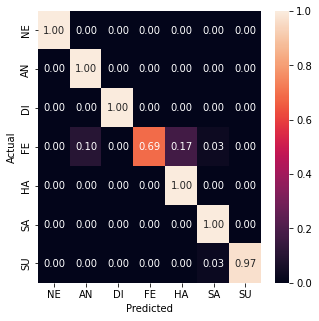

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
target_names = ['NE', 'AN', 'DI', 'FE', 'HA', 'SA', 'SU']
cm = confusion_matrix(y_true, y_pred_labels)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
model.save('/content/drive/MyDrive/Pixel attack/CK+.h5')